In [ ]:
import datetime
import pandas as pd
import warnings
import requests
from io import StringIO
import pandas_profiling


In [ ]:
# 爬取資料
def crawl_legal_person(date):
    
    # 將時間物件變成字串：'20180102'
    datestr = date.strftime('%Y%m%d')
    
    # 下載三大法人資料
    try:
        r = requests.get('http://www.tse.com.tw/fund/T86?response=csv&date='+datestr+'&selectType=ALLBUT0999')#
    except:
        return None

    # 製作三大法人的DataFrame
    try:
        df = pd.read_csv(StringIO(r.text), header=1).dropna(how='all', axis=1).dropna(how='any')
    except:
        return None
    
    # 微調整（為了配合資料庫的格式）

    # 刪除逗點
    df = df.astype(str).apply(lambda s: s.str.replace(',',''))

    # 刪除「證券代號」中的「"」和「=」
    df['stock_id'] = df['證券代號'].str.replace('=','').str.replace('"','')

    # 刪除「證券代號」這個欄位
    df = df.drop(['證券代號'], axis=1)

    # 設定index
    df['date'] = date
    df = df.set_index(['stock_id', 'date'])
    
    # 將dataframe的型態轉成數字
    return df.apply(lambda s: pd.to_numeric(s, errors='coerce')).dropna(how='all', axis=1)

df = crawl_legal_person(datetime.date(2020,6,1))
df.head()

,,外陸資買進股數(不含外資自營商),外陸資賣出股數(不含外資自營商),外陸資買賣超股數(不含外資自營商),外資自營商買進股數,外資自營商賣出股數,外資自營商買賣超股數,投信買進股數,投信賣出股數,投信買賣超股數,自營商買賣超股數,自營商買進股數(自行買賣),自營商賣出股數(自行買賣),自營商買賣超股數(自行買賣),自營商買進股數(避險),自營商賣出股數(避險),自營商買賣超股數(避險),三大法人買賣超股數
stock_id,date,,,,,,,,,,,,,,,,,
00637L,2020-06-01,35963000,543000,35420000,0.0,0.0,0.0,0,0,0,58891000,0,0,0,74837000,15946000,58891000,94311000
3481,2020-06-01,36985645,8207000,28778645,0.0,0.0,0.0,0,0,0,1125000,400000,26000,374000,958000,207000,751000,29903645
2409,2020-06-01,33472510,8559000,24913510,0.0,0.0,0.0,0,0,0,799000,186000,264000,-78000,1053000,176000,877000,25712510
3037,2020-06-01,24281000,7625000,16656000,0.0,0.0,0.0,2299000,1711000,588000,2555000,1297000,293000,1004000,1722000,171000,1551000,19799000
2303,2020-06-01,34188125,21119000,13069125,0.0,0.0,0.0,4990000,58000,4932000,49000,317000,125000,192000,133000,276000,-143000,18050125


In [ ]:
def crawl_n_days(n):
  dfList = []
  date = 
  dfList.push(crawl_legal_person(date)

In [ ]:
def crawlFund(date):
    datestr = date.strftime('%Y%m%d')
    url = 'https://www.twse.com.tw/fund/T86?response=csv&date='+datestr+'&selectType=ALLBUT0999'    
    res = requests.get(url)
    df = pd.read_csv(StringIO(res.text), header=1)    
    df = df.dropna(thresh=3).dropna(thresh=0.8, axis=1)
    return df

df = crawlFund(datetime.date(2020,6,1))
df.head()

,證券代號,證券名稱,外陸資買進股數(不含外資自營商),外陸資賣出股數(不含外資自營商),外陸資買賣超股數(不含外資自營商),外資自營商買進股數,外資自營商賣出股數,外資自營商買賣超股數,投信買進股數,投信賣出股數,投信買賣超股數,自營商買賣超股數,自營商買進股數(自行買賣),自營商賣出股數(自行買賣),自營商買賣超股數(自行買賣),自營商買進股數(避險),自營商賣出股數(避險),自營商買賣超股數(避險),三大法人買賣超股數
0,"=""00637L""",元大滬深300正2,"35,963,000","543,000","35,420,000",0.0,0.0,0.0,0,0,0,"58,891,000",0,0,0,"74,837,000","15,946,000","58,891,000","94,311,000"
1,3481,群創,"36,985,645","8,207,000","28,778,645",0.0,0.0,0.0,0,0,0,"1,125,000","400,000","26,000","374,000","958,000","207,000","751,000","29,903,645"
2,2409,友達,"33,472,510","8,559,000","24,913,510",0.0,0.0,0.0,0,0,0,"799,000","186,000","264,000","-78,000","1,053,000","176,000","877,000","25,712,510"
3,3037,欣興,"24,281,000","7,625,000","16,656,000",0.0,0.0,0.0,"2,299,000","1,711,000","588,000","2,555,000","1,297,000","293,000","1,004,000","1,722,000","171,000","1,551,000","19,799,000"
4,2303,聯電,"34,188,125","21,119,000","13,069,125",0.0,0.0,0.0,"4,990,000","58,000","4,932,000","49,000","317,000","125,000","192,000","133,000","276,000","-143,000","18,050,125"


In [ ]:
def crawler(date):
    datestr = date.strftime('%Y%m%d')
    url = 'https://www.twse.com.tw/exchangeReport/BWIBBU_d?response=csv&date='+datestr+'&selectType=ALL'
    res = requests.get(url)
    df = pd.read_csv(StringIO(res.text), header=1)
    df['本益比'] = pd.to_numeric(df['本益比'], errors='coerce')
    
    return df.dropna(thresh=3).dropna(thresh=0.8, axis=1)

In [ ]:
df = crawler(datetime.date(2020,6,1))
df.head()

NameError: ignored

In [ ]:
# df.loc[df['證券代號']=='2301']
df.loc[df['殖利率(%)']>=13]


,證券代號,證券名稱,殖利率(%),股利年度,本益比,股價淨值比,財報年/季
39,1316,上曜,16.95,107.0,NaN,1.13,109/1
67,1439,中和,13.48,108.0,3.55,1.22,109/1
69,1441,大東,46.41,107.0,NaN,0.72,109/1
293,2363,矽統,14.46,108.0,NaN,1.00,109/1
421,2601,益航,13.58,108.0,5.73,0.67,109/1
636,3712,永崴投控,17.92,107.0,NaN,0.56,109/1
682,4807,日成-KY,13.79,107.0,NaN,1.29,109/1
938,9945,潤泰新,13.03,108.0,4.67,0.75,109/1


In [ ]:
res = !pip list | grep -F pandas-profiling
if res is None:
  !pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

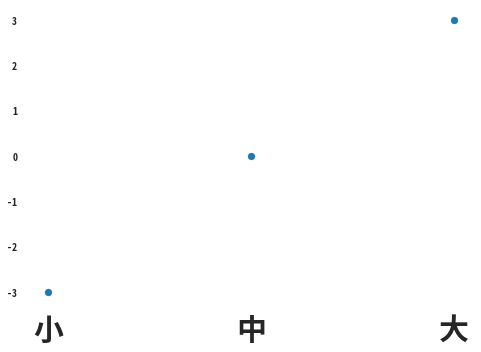

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 設定字體的檔案位置，並放到fm.FontProperties裡
fontPath = r'drive/My Drive/fonts/NotoSansMonoCJKtc-Bold.otf'
font30 = fm.FontProperties(fname=fontPath, size=30)

x_labels = ['小', '中', '大']
x = range(len(x_labels))
y = [-3, 0, 3]

# 在plt.xticks中，加入fontproperties=font30參數
plt.scatter(x, y)
plt.xticks(x,x_labels, fontproperties=font30)

plt.show()

In [ ]:
import matplotlib
import matplotlib.font_manager as fm

fontPath = r'drive/My Drive/fonts/NotoSansMonoCJKtc-Bold.otf'

if fm.fontManager.findfont(fm.FontProperties(fname=fontPath),'otf') is None:
  fm.fontManager.ttflist += fm.createFontList([fontPath])

matplotlib.rc('font', family='Noto Sans Mono CJK TC')

In [ ]:
import pandas_profiling
df.profile_report()